In [1]:
# Import lybrary
import math
import numpy as np
import pandas as pd
from datetime import datetime 
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin
import seaborn as sns

In [2]:
import pandas as pd
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr
from urllib3.exceptions import IncompleteRead
from requests.exceptions import ChunkedEncodingError

yf.pdr_override()

def get_historical_data(tickers):
    data = pd.DataFrame()
    names = list()
    
    for i in tickers:
        for attempt in range(3):  # Retry up to 3 times
            try:
                raw_data = pdr.get_data_yahoo(tickers=i, start=datetime(2018, 1, 1), end=datetime(2023, 12, 31)).iloc[:, 4]
                data = pd.concat([data, raw_data], axis=1)
                names.append(i)
                break  # Break out of the retry loop if successful
            except (IncompleteRead, ChunkedEncodingError) as e:
                print(f"Error fetching data for {i}. Retrying...")

    data.columns = names
    return data

# The ticker names of the companies that we will be looking at.
ticks = ["BKNG", "EZJ","HLN", "IHG", "PYPL", "PDD"]
d = get_historical_data(ticks)
print(d.shape)
# Most Recent Data
d.tail()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
(1509, 6)


,BKNG,EZJ,HLN,IHG,PYPL,PDD
2023-12-22 00:00:00,3526.675049,35.446800,8.049429,89.383354,61.840000,144.479996
2023-12-26 00:00:00,3557.545898,35.436813,8.098812,89.304153,62.560001,145.220001
2023-12-27 00:00:00,3525.617676,35.766411,8.177825,90.076317,62.680000,144.449997
2023-12-28 00:00:00,3541.407471,36.255814,8.177825,90.115921,63.080002,145.350006
2023-12-29 00:00:00,3538.165771,36.285778,8.128442,90.264412,61.410000,146.309998


In [3]:
# Saving the most recent year data

# Called dT (DataTest)
dT = d.iloc[d.shape[0] - 252:,:] # Data test

# Update the "Training" or "data full"
d = d.iloc[:d.shape[0] - 252,:] # Data Train for the Simulation

print("Testing Data dimensions: ", dT.shape)
print("Training Data dimensions:", d.shape)

Testing Data dimensions:  (252, 6)
Training Data dimensions: (1257, 6)


# Expected Return

In [6]:
from scipy import stats
#Calculating daily return
expected_returns_a = d.pct_change() 
expected_returns_a.columns = ticks # Setting the Column names 

#Annual return
expected_returns_aA = pd.DataFrame(expected_returns_a.mean()*250) 
expected_returns_aA = expected_returns_aA.T # Transpose the values 

#portfolio returns for each period (in this case day to day)
dar = d.pct_change().iloc[1:,:]+1 

# Geometric Average Rate of Return
gar = pd.DataFrame(np.prod(dar)**(1/float(5)) - 1) 
# print(gar)
full_return_annual = (pd.concat([expected_returns_aA.T, gar], axis = 1))

full_return_annual.columns = ["Average Arithmetic Returns", "Average Geometric Returns"] 
print("Expected Annual Returns ", expected_returns_aA)
print("dar", dar)
print("Full Annual Return", full_return_annual)

Expected Annual Returns        BKNG       EZJ       HLN       IHG     PYPL      PDD
0  0.08671 -0.018338  0.253404  0.056481  0.07583  0.56847
dar                 BKNG       EZJ       HLN       IHG      PYPL       PDD
2018-01-03  1.022082  1.021591       NaN  0.996082  1.039410       NaN
2018-01-04  0.990730  1.031887       NaN  0.999528  0.999739       NaN
2018-01-05  1.009014  1.005390       NaN  0.996064  1.025674       NaN
2018-01-08  1.015503  1.011222       NaN  1.003951  1.004447       NaN
2018-01-09  1.007279  0.996678       NaN  1.002519  1.001771       NaN
...              ...       ...       ...       ...       ...       ...
2022-12-21  1.006326  0.990997  1.013021  0.995229  1.006544  1.003269
2022-12-22  0.980765  0.997400  1.015424  0.994521  0.990753  0.994880
2022-12-23  1.019933  1.004931  1.012658  1.006714  1.006708  0.982922
2022-12-27  1.013568  0.982124  0.993750  0.996238  0.989860  1.013924
2022-12-28  0.980268  0.981799  0.994969  0.989701  0.988585  0.955634



Correlation Matrix:
          BKNG       EZJ       HLN       IHG      PYPL       PDD
BKNG  1.000000  0.541278  0.130617  0.674663  0.433644  0.234747
EZJ   0.541278  1.000000  0.188145  0.594629  0.454687  0.263502
HLN   0.130617  0.188145  1.000000  0.186218  0.035931  0.056529
IHG   0.674663  0.594629  0.186218  1.000000  0.430977  0.213908
PYPL  0.433644  0.454687  0.035931  0.430977  1.000000  0.341510
PDD   0.234747  0.263502  0.056529  0.213908  0.341510  1.000000


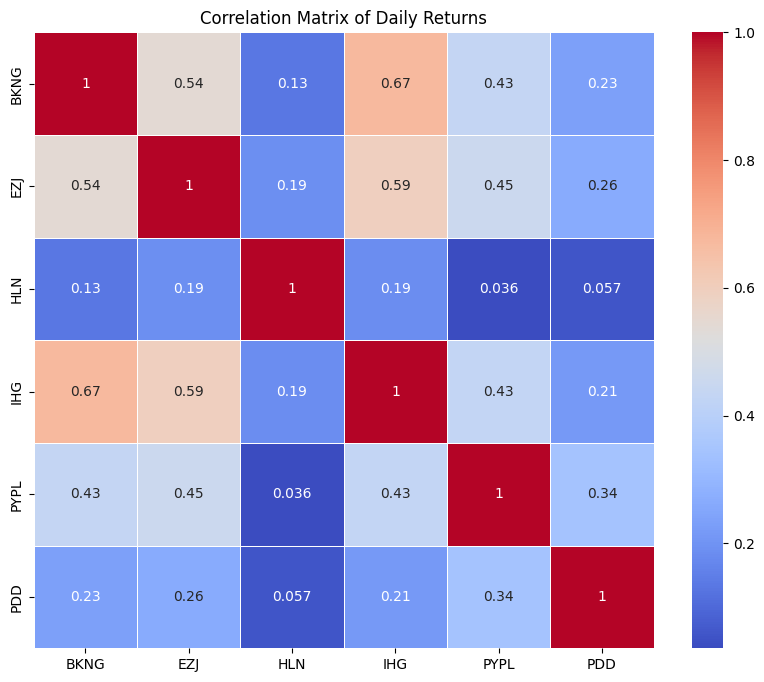

In [7]:
# Calculate the correlation matrix
correlation_matrix = expected_returns_a.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Daily Returns')
plt.show()

In [5]:
# Storing lists that retain returns, volatility, and weights of the Simulated portfolios
portfolio_returns = []
portfolio_volatility = []
sharpe_ratio = []

# radmoized stock weights
stock_weights = []

# Number of Indiviudal securities that will be a part of the portfolio
num_assets = len(ticks)
# Number of simulated iterations
num_portfolios = 100000


# Getting the covariance matrix
# Gets a percentage change one day to the next
daily_returns = d.pct_change()
# Converting daily returns to annual returns (standardizing to a year)
annual_returns = (daily_returns.mean() * 250) + 1

# Obtaining the covariance of annual
cov_daily = daily_returns.cov() # Covariance
cov_annual = cov_daily*250 # Covariance Annualized

print(annual_returns)

BKNG    1.086710
EZJ     0.981662
HLN     1.253404
IHG     1.056481
PYPL    1.075830
PDD     1.568470
dtype: float64


# Efficient Frontier

In [6]:
# Setting seed of interpretability
np.random.seed(3)
# Filling in the lists with a simulated return, risk, and a given weight
# num_portfolios
for i in range(num_portfolios):
    # Randomly assign weights
    weights = np.random.random(num_assets)
    # Standardize the weights
    weights /= np.sum(weights)
    returns = (np.dot(weights, (annual_returns)))
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    
    """
    sharpe ratio: This calculates the risk adjusted return
    It suggests that adding assets to a portfolio that have low correlation can decrease portfolio risk without 
    sacrificing return 
    """
    sharpe = ((returns-1) / volatility)
    sharpe_ratio.append(sharpe)
    portfolio_returns.append(returns-1)
    portfolio_volatility.append(volatility)
    stock_weights.append(weights)

In [7]:
# Storing the portfolio values
portfolio = {'Returns': portfolio_returns,
             'Volatility': portfolio_volatility,
             'Sharpe Ratio': sharpe_ratio}

# Add an additional entry to the portfolio such that each indivudal weight is incorporated for its corresponding company
for counter,symbol in enumerate(ticks):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)
df

,Returns,Volatility,Sharpe Ratio,BKNG Weight,EZJ Weight,HLN Weight,IHG Weight,PYPL Weight,PDD Weight
0,0.185607,0.336198,0.552075,0.143067,0.183938,0.075561,0.132685,0.231939,0.232808
1,0.234019,0.387594,0.603773,0.095734,0.157982,0.039234,0.336031,0.022775,0.348245
2,0.207169,0.299421,0.691899,0.233708,0.100262,0.243469,0.212725,0.008634,0.201201
3,0.110498,0.282343,0.391361,0.115308,0.184626,0.126104,0.308289,0.195902,0.069771
4,0.215510,0.355267,0.606614,0.171400,0.245564,0.096412,0.069850,0.122094,0.294679
...,...,...,...,...,...,...,...,...,...
99995,0.249634,0.335571,0.743908,0.032511,0.144753,0.295632,0.024069,0.228899,0.274137
99996,0.137461,0.327091,0.420252,0.233311,0.271692,0.001537,0.257444,0.054574,0.181441
99997,0.239963,0.373399,0.642645,0.183092,0.033224,0.073787,0.198145,0.195090,0.316663
99998,0.121918,0.260349,0.468287,0.159816,0.284286,0.282469,0.069947,0.158186,0.045295


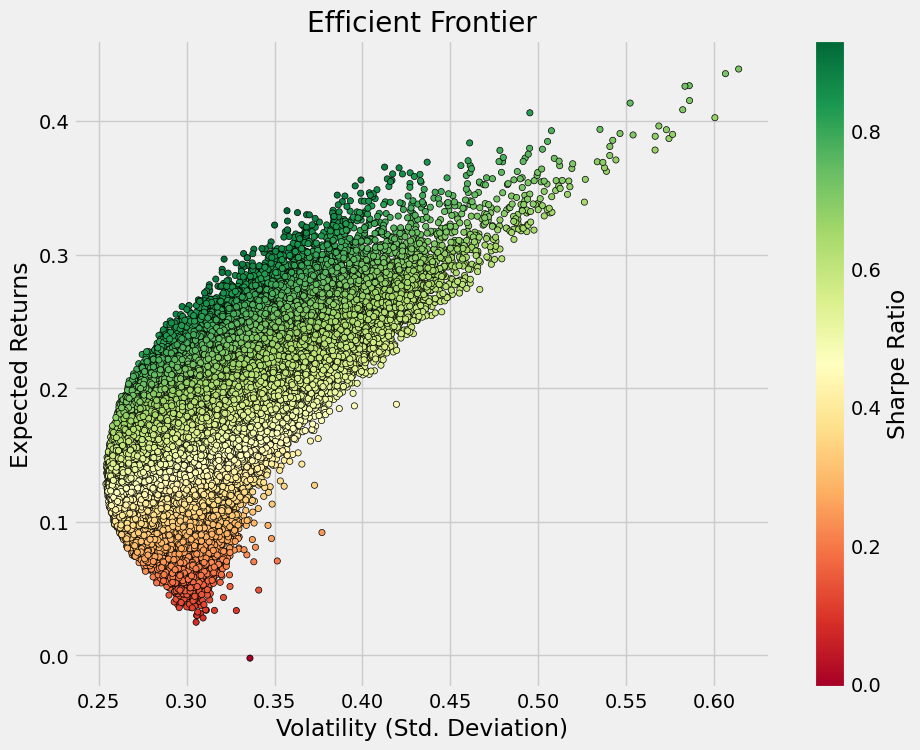

In [8]:
# PLotting the efficient frontier.
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

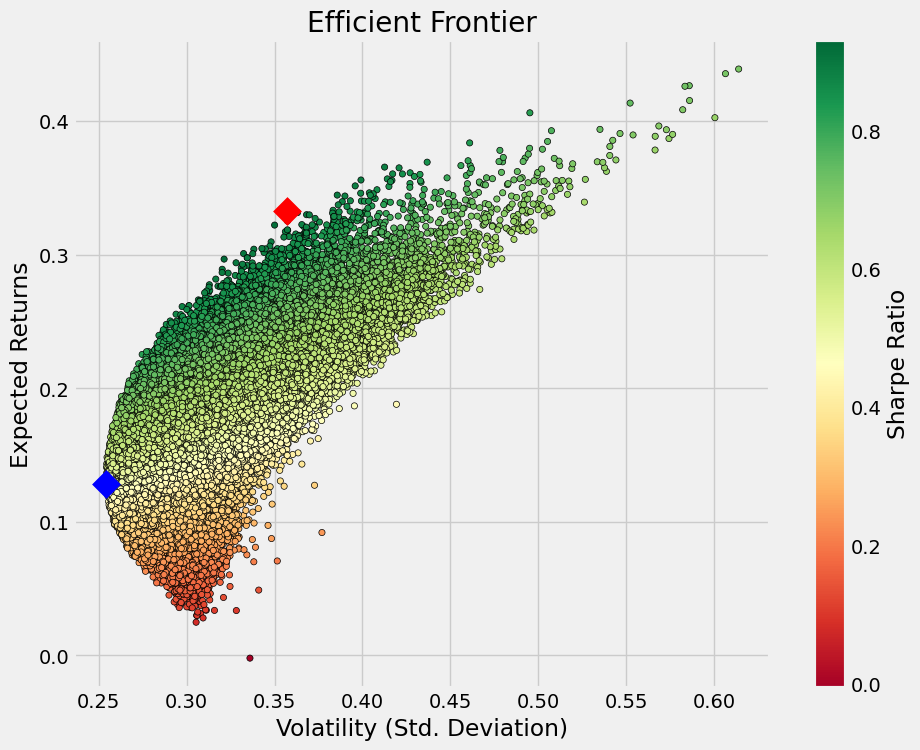

In [9]:
# Finding the Optimal Portfolio
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('fivethirtyeight')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()


# Minimum Risk Adjusted Values & Max Risk Adjusted Values

In [10]:
# Additional Details
r_ef = pd.concat([min_variance_port.T,sharpe_portfolio.T], axis = 1)
r_ef.columns = ["Minimum Risk Adjusted Values", "Max Risk Adjusted Values"]
print(r_ef)

              Minimum Risk Adjusted Values  Max Risk Adjusted Values
Returns                           0.128410                  0.332959
Volatility                        0.254085                  0.357105
Sharpe Ratio                      0.505382                  0.932383
BKNG Weight                       0.147357                  0.070713
EZJ Weight                        0.177710                  0.004051
HLN Weight                        0.384174                  0.557129
IHG Weight                        0.109132                  0.012771
PYPL Weight                       0.178373                  0.034499
PDD Weight                        0.003255                  0.320836


# Simulation for Ideal Stock

In [12]:
amount_invest = 1000
expected_return = pd.DataFrame(amount_invest * (1+r_ef.iloc[0,:]))
print("----------------------------------------------------------------")
print("                Expected Returns on my Portfolio")
print("----------------------------------------------------------------")
print(expected_return.T)
print("")
print("----------------------------------------------------------------")
print("If I invested", amount_invest,"USD on |", dT.index[0],"| I would have...")
actual_return = (dT.iloc[dT.shape[0]-1,:] - dT.iloc[0,:]) / ( dT.iloc[0,:])
# Multipling the weights to the price at the beginning of the year
beg_price = (dT.iloc[0,:])
end_price = dT.iloc[dT.shape[0]-1,:]
print("----------------------------------------------------------------")
# Weights derived from the Efficient Frontier Portfolio
# Weights for Minimum Risk
w = np.array(r_ef.iloc[3:,0])

percentage_change = (end_price - beg_price)/(beg_price)+1
print("Using the Portfolio Weights for Minimum Risk Return Portfolio")
money_left = sum(w * percentage_change* amount_invest)
print("")
print("    Starting balance $ 1000 : Ending with $ ",round(money_left, 2))
print("")
print("----------------------------------------------------------------")
print("Using the Portfolio Weights Maximized Risk-Return Portfolio")
# Weights for Maxmimum Risk
w1 = np.array(r_ef.iloc[3:,1])

money_left1 = sum(w1 * percentage_change* amount_invest)
print("")
print("    Starting balance $ 1000 : Ending with $ ", round(money_left1,2))
print("")

----------------------------------------------------------------
                Expected Returns on my Portfolio
----------------------------------------------------------------
         Minimum Risk Adjusted Values  Max Risk Adjusted Values
Returns                   1128.409902               1332.958911

----------------------------------------------------------------
If I invested 1000 USD on | 2022-12-29 00:00:00 | I would have...
----------------------------------------------------------------
Using the Portfolio Weights for Minimum Risk Return Portfolio

    Starting balance $ 1000 : Ending with $  1223.19

----------------------------------------------------------------
Using the Portfolio Weights Maximized Risk-Return Portfolio

    Starting balance $ 1000 : Ending with $  1326.73

